# **PERCEPTRON** 👁️

this script is for setup, execution, and evaluation of the perceptron algorithm

In [4]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import funcs as f
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy.stats as sts
from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_val_score
from tabulate import tabulate

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
'''
Set clf, import data from data_organization.ipynb, and set random seed

'''
clf = Perceptron()

# final df for display
dfr = pd.DataFrame(index=['All', 'GUS Focus', 'TGUS Focus', 'Raw Focus'], columns=['Avg. Train %', 'Avg. Validation %', 'Avg. Test %',
                                                                                   'Best Sc. Train %', 'Best Sc. Validation %', 'Best Sc. Test %'])

df_all = pd.read_csv('../data/df_all.csv').drop('Unnamed: 0', axis = 1)
df_gus = pd.read_csv('../data/df_gus.csv').drop('Unnamed: 0', axis = 1)
df_tgus = pd.read_csv('../data/df_tgus.csv').drop('Unnamed: 0', axis = 1)
df_tgus_st = pd.read_csv('../data/df_tgus*.csv').drop('Unnamed: 0', axis = 1)
df_raw = pd.read_csv('../data/df_raw.csv').drop('Unnamed: 0', axis = 1)

np.random.seed(8)

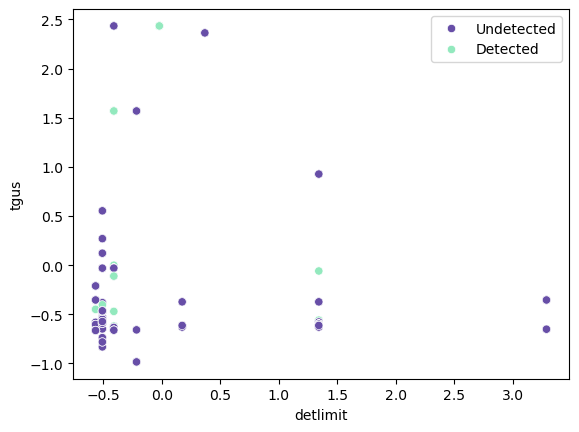

In [6]:
plot1 = sns.scatterplot(x='detlimit', y='tgus', hue='detected', data = df_all, palette = ['#674ea7','#93e9be'])
handles, labels  =  plot1.get_legend_handles_labels()
plot1.legend(handles, ['Undetected', 'Detected'], loc='upper right')

"\nhandles, labels  =  plot1.get_legend_handles_labels()\nplot1.legend(handles, ['Undetected', 'Detected'], loc='upper right')\n"

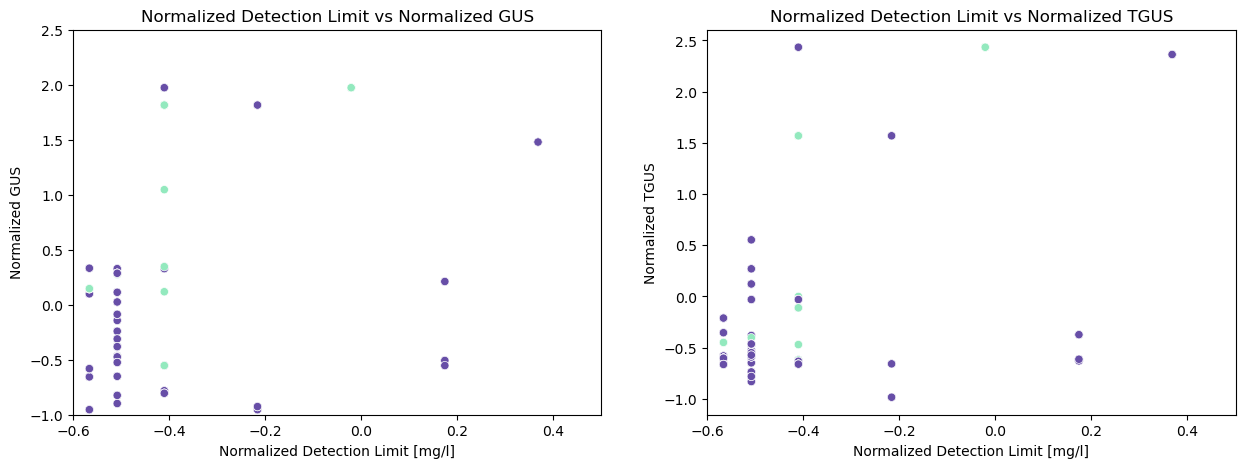

In [7]:
fig, (axGUS, axTGUS) = plt.subplots(nrows=1, ncols=2, figsize =(15,5), sharex = 'row')
sns.scatterplot(ax = axGUS, x='detlimit', y='gus', hue='detected', data = df_all, palette = ['#674ea7','#93e9be'], legend = False)
sns.scatterplot(ax = axTGUS, x='detlimit', y='tgus', hue='detected', data = df_all, palette = ['#674ea7','#93e9be'],legend = False)
#sns.scatterplot(ax = axTGUSST, x='detlimit', y='tgus*', hue='detected', data = df_all, palette = ['#b31b1b','blue'])

axGUS.set_title('Normalized Detection Limit vs Normalized GUS',fontsize=12)
axGUS.set_xlabel('Normalized Detection Limit [mg/l]', fontsize=10)
axGUS.set_ylabel('Normalized GUS', fontsize=10)
axGUS.set_ylim(-1, 2.5)
axGUS.set_xlim(-.6,.5)


axTGUS.set_title('Normalized Detection Limit vs Normalized TGUS',fontsize=12)
axTGUS.set_ylabel('Normalized TGUS',  fontsize=10)
axTGUS.set_xlabel('Normalized Detection Limit [mg/l]', fontsize=10)

'''
handles, labels  =  plot1.get_legend_handles_labels()
plot1.legend(handles, ['Undetected', 'Detected'], loc='upper right')
'''
#axTGUSST.set_title('Normalized Detection Limit vs Normalized TGUS*',fontsize=10)
#axTGUSST.set_ylabel('Normalized TGUS*')


In [8]:
'''
Considering GUS, TGUS,  TGUS*, and raw values with other features

'''
all_train =[]
all_vals =[]
all_tests=[]
for i in range(100):
    model, train_acc, val_acc, test_acc = f.kfold_crossval(df_all, clf, 'perceptron')
    all_train = np.append(train_acc, all_train)
    all_vals = np.append(val_acc, all_vals)
    all_tests = np.append(test_acc, all_tests)

    # keep best model
    if test_acc >= np.max(all_tests):
        all_model = model
        all_train_best = train_acc
        all_val_best = val_acc
        all_test_best = test_acc

# get average accuracies
all_train_avg = round(np.mean(all_train),1)
all_vals_avg = round(np.mean(all_vals),1)
all_tests_avg = round(np.mean(all_tests),1)

print('All - Results:')
print(f'Best Scenario Training Accuracy: {all_train_best}%')
print(f'Average Training Accuracy: {all_train_avg}%')
print(f'Best Scenario Validation Accuracy: {all_val_best}%')
print(f'Average Validation Accuracy: {all_vals_avg}%')
print(f'Best Scenario Test Accuracy: {all_test_best}%')
print(f'Average Test Accuracy: {all_tests_avg}%')


All - Results:
Best Scenario Training Accuracy: 92.0%
Average Training Accuracy: 91.0%
Best Scenario Validation Accuracy: 94.3%
Average Validation Accuracy: 94.5%
Best Scenario Test Accuracy: 96.2%
Average Test Accuracy: 87.6%


In [9]:
'''
Considering just GUS with other features

'''
gus_train =[]
gus_vals =[]
gus_tests=[]
for i in range(100):
    model, train_acc, val_acc, test_acc = f.kfold_crossval(df_gus, clf, 'perceptron')
    gus_train = np.append(train_acc, gus_train)
    gus_vals = np.append(val_acc, gus_vals)
    gus_tests = np.append(test_acc, gus_tests)

    # keep best model
    if test_acc >= np.max(gus_tests):
        gus_model = model
        gus_train_best = train_acc
        gus_val_best = val_acc
        gus_test_best = test_acc


# get average accuracies
gus_train_avg = round(np.mean(gus_train),1)
gus_vals_avg = round(np.mean(gus_vals),1)
gus_tests_avg = round(np.mean(gus_tests),1)

print('GUS - Results:')
print(f'Best Scenario Training Accuracy: {gus_train_best}%')
print(f'Average Training Accuracy: {gus_train_avg}%')
print(f'Best Scenario Validation Accuracy: {gus_val_best}%')
print(f'Average Validation Accuracy: {gus_vals_avg}%')
print(f'Best Scenario Test Accuracy: {gus_test_best}%')
print(f'Average Test Accuracy: {gus_tests_avg}%')


GUS - Results:
Best Scenario Training Accuracy: 90.60000000000001%
Average Training Accuracy: 88.8%
Best Scenario Validation Accuracy: 92.9%
Average Validation Accuracy: 92.7%
Best Scenario Test Accuracy: 95.3%
Average Test Accuracy: 85.4%


In [10]:
'''
Considering just TGUS with other features

'''
tgus_train =[]
tgus_vals =[]
tgus_tests=[]
for i in range(100):
    model, train_acc, val_acc, test_acc = f.kfold_crossval(df_tgus, clf, 'perceptron')
    tgus_train = np.append(train_acc, tgus_train)
    tgus_vals = np.append(val_acc, tgus_vals)
    tgus_tests = np.append(test_acc, tgus_tests)

    # keep best model
    if test_acc >= np.max(tgus_tests):
        tgus_model = model
        tgus_train_best = train_acc
        tgus_val_best = val_acc
        tgus_test_best = test_acc



# get average accuracies
tgus_train_avg = round(np.mean(tgus_train),1)
tgus_vals_avg = round(np.mean(tgus_vals),1)
tgus_tests_avg = round(np.mean(tgus_tests),1)

print('TGUS - Results:')
print(f'Best Scenario Training Accuracy: {tgus_train_best}%')
print(f'Average Training Accuracy: {tgus_train_avg}%')
print(f'Best Scenario Validation Accuracy: {tgus_val_best}%')
print(f'Average Validation Accuracy: {tgus_vals_avg}%')
print(f'Best Scenario Test Accuracy: {tgus_test_best}%')
print(f'Average Test Accuracy: {tgus_tests_avg}%')

TGUS - Results:
Best Scenario Training Accuracy: 88.6%
Average Training Accuracy: 86.5%
Best Scenario Validation Accuracy: 91.4%
Average Validation Accuracy: 90.5%
Best Scenario Test Accuracy: 93.4%
Average Test Accuracy: 82.3%


In [11]:
'''
Considering just TGUS* and raw values with other features


tgus_st_train =[]
tgus_st_vals =[]
tgus_st_tests=[]
for i in range(30):
    model, train_acc, val_acc, test_acc = f.kfold_crossval(df_tgus_st, clf, 'perceptron')
    tgus_st_train = np.append(train_acc, tgus_st_train)
    tgus_st_vals = np.append(val_acc, tgus_st_vals)
    tgus_st_tests = np.append(test_acc, tgus_st_tests)

    # keep best model
    if test_acc >= np.max(tgus_st_tests):
        tgus_st_model = model
        tgus_st_train_acc = train_acc
        tgus_st_val_acc = val_acc
        tgus_st_test_acc = test_acc

print('TGUS* - Results:')
print(f'Best Scenario Training Accuracy: {tgus_st_train_acc}%')
print(f'Average Training Accuracy: {round(np.mean(tgus_st_train),1)}%')
print(f'Best Scenario Validation Accuracy: {tgus_st_val_acc}%')
print(f'Average Validation Accuracy: {round(np.mean(tgus_st_vals),1)}%')
print(f'Best Scenario Test Accuracy: {tgus_st_test_acc}%')
print(f'Average Test Accuracy: {round(np.mean(tgus_st_tests),1)}%')
'''

"\nConsidering just TGUS* and raw values with other features\n\n\ntgus_st_train =[]\ntgus_st_vals =[]\ntgus_st_tests=[]\nfor i in range(30):\n    model, train_acc, val_acc, test_acc = f.kfold_crossval(df_tgus_st, clf, 'perceptron')\n    tgus_st_train = np.append(train_acc, tgus_st_train)\n    tgus_st_vals = np.append(val_acc, tgus_st_vals)\n    tgus_st_tests = np.append(test_acc, tgus_st_tests)\n\n    # keep best model\n    if test_acc >= np.max(tgus_st_tests):\n        tgus_st_model = model\n        tgus_st_train_acc = train_acc\n        tgus_st_val_acc = val_acc\n        tgus_st_test_acc = test_acc\n\nprint('TGUS* - Results:')\nprint(f'Best Scenario Training Accuracy: {tgus_st_train_acc}%')\nprint(f'Average Training Accuracy: {round(np.mean(tgus_st_train),1)}%')\nprint(f'Best Scenario Validation Accuracy: {tgus_st_val_acc}%')\nprint(f'Average Validation Accuracy: {round(np.mean(tgus_st_vals),1)}%')\nprint(f'Best Scenario Test Accuracy: {tgus_st_test_acc}%')\nprint(f'Average Test Accu

In [12]:
'''
Considering just raw values with other features

'''
raw_train =[]
raw_vals =[]
raw_tests=[]
for i in range(100):
    model, train_acc, val_acc, test_acc = f.kfold_crossval(df_raw, clf, 'perceptron')
    raw_train = np.append(train_acc, raw_train)
    raw_vals = np.append(val_acc, raw_vals)
    raw_tests = np.append(test_acc, raw_tests)

    # keep best model
    if test_acc >= np.max(raw_tests):
        raw_model = model
        raw_train_best = train_acc
        raw_val_best = val_acc
        raw_test_best = test_acc



# get average accuracies
raw_train_avg = round(np.mean(raw_train),1)
raw_vals_avg = round(np.mean(raw_vals),1)
raw_tests_avg = round(np.mean(raw_tests),1)

print('Raw - Results:')
print(f'Best Scenario Training Accuracy: {raw_train_best}%')
print(f'Average Training Accuracy: {raw_train_avg}%')
print(f'Best Scenario Validation Accuracy: {raw_val_best}%')
print(f'Average Validation Accuracy: {raw_vals_avg}%')
print(f'Best Scenario Test Accuracy: {raw_test_best}%')
print(f'Average Test Accuracy: {raw_tests_avg}%')



Raw - Results:
Best Scenario Training Accuracy: 91.5%
Average Training Accuracy: 89.9%
Best Scenario Validation Accuracy: 90.0%
Average Validation Accuracy: 93.5%
Best Scenario Test Accuracy: 95.3%
Average Test Accuracy: 86.1%


In [13]:
# fill results table
dfr.loc['All',:] = [all_train_avg, all_vals_avg, all_tests_avg, all_train_best, all_val_best, all_test_best]
dfr.loc['GUS Focus',:] = [gus_train_avg, gus_vals_avg, gus_tests_avg, gus_train_best, gus_val_best, gus_test_best]
dfr.loc['TGUS Focus',:] = [tgus_train_avg, tgus_vals_avg, tgus_tests_avg, tgus_train_best, tgus_val_best, tgus_test_best]
dfr.loc['Raw Focus',:] = [raw_train_avg, raw_vals_avg, raw_tests_avg, raw_train_best, raw_val_best, raw_test_best]

print(tabulate(dfr, headers='keys', tablefmt = 'fancy_grid', numalign = 'center'))

╒════════════╤════════════════╤═════════════════════╤═══════════════╤════════════════════╤═════════════════════════╤═══════════════════╕
│            │  Avg. Train %  │  Avg. Validation %  │  Avg. Test %  │  Best Sc. Train %  │  Best Sc. Validation %  │  Best Sc. Test %  │
╞════════════╪════════════════╪═════════════════════╪═══════════════╪════════════════════╪═════════════════════════╪═══════════════════╡
│ All        │       91       │        94.5         │     87.6      │         92         │          94.3           │       96.2        │
├────────────┼────────────────┼─────────────────────┼───────────────┼────────────────────┼─────────────────────────┼───────────────────┤
│ GUS Focus  │      88.8      │        92.7         │     85.4      │        90.6        │          92.9           │       95.3        │
├────────────┼────────────────┼─────────────────────┼───────────────┼────────────────────┼─────────────────────────┼───────────────────┤
│ TGUS Focus │      86.5      │        90

In [14]:
'''
Equal variance t-tests to compare result means
'''
cols = ['All', 'GUS', 'TGUS', 'Raw']
train_scores = pd.DataFrame({'All': all_train, 'GUS': gus_train, 'TGUS': tgus_train, 'Raw': raw_train})
val_scores = pd.DataFrame({'All': all_vals, 'GUS': gus_vals, 'TGUS': tgus_vals, 'Raw': raw_vals})
test_scores = pd.DataFrame({'All': all_tests, 'GUS': gus_tests, 'TGUS': tgus_tests, 'Raw': raw_tests})

comp_train = pd.DataFrame(columns = train_scores.columns, index = train_scores.columns )
comp_val = pd.DataFrame(columns = train_scores.columns, index = train_scores.columns )
comp_test = pd.DataFrame(columns = train_scores.columns, index = train_scores.columns )

for i in cols:
    for j in cols:
        stat_train,p_train = sts.ttest_ind(train_scores.loc[:,i], train_scores.loc[:,j], equal_var = True, alternative = 'two-sided')
        comp_train.loc[i,j] = [round(p_train,100)]

        stat_val,p_val = sts.ttest_ind(val_scores.loc[:,i], val_scores.loc[:,j], equal_var = True, alternative = 'two-sided')
        comp_val.loc[i,j] = [round(p_val,100)]

        stat_test,p_test = sts.ttest_ind(test_scores.loc[:,i], test_scores.loc[:,j], equal_var = True, alternative = 'two-sided')
        comp_test.loc[i,j] = [round(p_test,100)]
        


